# Investigate Hotel Business using Data Visualization

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings_data.csv to hotel_bookings_data.csv


In [111]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

In [112]:
df=pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
109156,City Hotel,0,8,2019,June,14,5,0,2,2,...,0,No Deposit,9.0,NaN,0,Personal,224.0,0,0,Check-Out
29157,Resort Hotel,0,1,2018,February,50,5,1,0,2,...,1,No Deposit,NaN,NaN,0,Bussiness,66.0,1,1,Check-Out
67151,City Hotel,1,286,2019,June,17,29,1,1,2,...,0,No Deposit,9.0,NaN,0,Personal,109.8,0,0,Canceled
101897,City Hotel,0,27,2018,January,47,16,0,4,2,...,0,No Deposit,9.0,NaN,0,Personal,88.4,0,2,Check-Out
39646,Resort Hotel,0,258,2019,October,34,20,2,2,2,...,0,No Deposit,410.0,NaN,0,Personal,118.5,0,2,Check-Out


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari hasil pengamatan diketahui bahwa : 
- Dataset terdiri dari  119390 baris dan 29 kolom.
- Beberapa feature masih memiliki tipe data yang belum sesuai. 
- Feature company, agent, city, dan children masih memiliki nilai null(missing values).

In [114]:
#Grouping Categorical & Numerical Features
categorical=df.loc[:,df.dtypes==np.object]
cats= categorical.columns
cats

Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [115]:
numerical=df.loc[:,df.dtypes!=np.object]
nums= numerical.columns
nums

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [116]:
# Analisis Categorical Features
df[cats].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [117]:
# Analisis Numerical Features
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### **Data Cleansing**

##### **Handle Missing Value**

In [118]:
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [119]:
# Check percentage null values
round(df.isnull().sum()/df.shape[0],5).sort_values(ascending = False)

company                           0.94307
agent                             0.13686
city                              0.00409
children                          0.00003
hotel                             0.00000
is_repeated_guest                 0.00000
total_of_special_requests         0.00000
required_car_parking_spaces       0.00000
adr                               0.00000
customer_type                     0.00000
days_in_waiting_list              0.00000
deposit_type                      0.00000
booking_changes                   0.00000
previous_bookings_not_canceled    0.00000
previous_cancellations            0.00000
market_segment                    0.00000
distribution_channel              0.00000
is_canceled                       0.00000
meal                              0.00000
babies                            0.00000
adults                            0.00000
stays_in_weekdays_nights          0.00000
stays_in_weekend_nights           0.00000
arrival_date_day_of_month         

- Missing value terbanyak terdapat dalam feature company hingga 94%, sehingga feature ini harus di drop dari dataframe.
- Missing values pada feature agent akan ditangani dengan impute features menggunakan modus.
- Missing values pada feature country dan children yang jumlahnya dibawah 1% akan dihapus dari dataset.

In [120]:
# Drop feature company
df=df.drop(columns='company',axis=1)

In [121]:
# impute feature agent with mode
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])

In [122]:
# drop null values
df = df.dropna()

In [123]:
# re-check missing values
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
city                              0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_weekdays_nights          0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year                 0
lead_time                         0
reservation_status          

Pengecekan missing values dilakukan untuk memastikan bahwa data dengan nilai null / missing values telah dihandle dengan baik.

#####**Handle Incorrect Data Type**

In [124]:
# Handle incorrect data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('object')

Penanganan dilakukan pada feature children dan agen yang memiliki tipe data float. Untuk feature children tipe data float akan diubah menjadi integer. Sedangkan tipe data agent akan diubah menjadi object.

##### **Handle Unsuitable Value**

In [125]:
for col in cats:
  print(f'''Value count column {col}:''')
  print(df[col].value_counts())
  print('---'*10, '\n')

Value count column hotel:
City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64
------------------------------ 

Value count column arrival_date_month:
October      13852
September    12628
July         11779
December     11095
June         11045
August       10927
November     10467
May           9739
April         8012
January       6752
February      6728
March         5874
Name: arrival_date_month, dtype: int64
------------------------------ 

Value count column meal:
Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64
------------------------------ 

Value count column city:
Kota Denpasar              48586
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang             

Feature meal dan distribution_channel memiliki value yang tidak sesuai, sehingga perlu ditangani dengan mengganti nilai 'Undefined' pada feature meal dengan nilai 'No Meal' dan nilai 'TA/TO' pada feature distribution_channel. 

In [126]:
df['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

In [127]:
# Replace 'Undefined' with 'No Meal' in meal feature
df = df.replace({'meal': {'Undefined':'No Meal'}})
df['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64

In [128]:
df['distribution_channel'].value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

In [129]:
# Replace 'Undefined' with 'TA/TO' in distribution_channel feature
df = df.replace({'distribution_channel': {'Undefined':'TA/TO'}})
df['distribution_channel'].value_counts()

TA/TO        97731
Direct       14483
Corporate     6491
GDS            193
Name: distribution_channel, dtype: int64

##### **Remove Unnecessary Data**

In [130]:
# Create feature total_guests
df['total_guests'] = df['babies'] + df['children']+df['adults']

In [131]:
print('Data with 0 total_guests: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))

Data with 0 total_guests: 170 out of 118898 all data


In [132]:
# Create feature total_stay_duration
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [133]:
print('Data with 0 stay_duration: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))

Data with 0 stay_duration: 701 out of 118898 all data


In [134]:
# Remove total_guests & stay_duration with 0 value
df_final = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()
df_final.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
60500,City Hotel,1,143,2018,January,46,12,2,1,2,...,No Deposit,9.0,0,Personal,90.0,0,0,Canceled,2,3
115316,City Hotel,0,0,2019,September,27,3,1,0,2,...,No Deposit,9.0,0,Personal,138.0,0,2,Check-Out,3,1
88911,City Hotel,0,0,2018,July,20,11,0,3,2,...,No Deposit,9.0,0,Personal,150.0,1,1,Check-Out,2,3
13425,Resort Hotel,1,146,2019,October,33,14,2,5,3,...,No Deposit,240.0,0,Personal,240.0,0,1,Canceled,3,7
12725,Resort Hotel,1,148,2019,September,28,14,2,3,3,...,No Deposit,240.0,0,Personal,311.0,0,1,Canceled,4,5


Actual visitor merupakan customer yang memiliki nilai total_guests dan stay_duration lebih dari 0. Nilai total_guests diperoleh dari kombinasi feature adults, children, dan babies. Nilai stay_duration diperoleh dari kombinasi feature stay_in_weekend_nights dan stay_in_weekdays_nights. Tahap selanjutnya menggunakan df_final yang merupakan dataframe dengan actual visitor.

### **Data Visualization**

In [135]:
df_final.shape

(118088, 30)

In [136]:
df_fixed=df_final.copy()

In [137]:
df_fixed.iloc[:,:15].sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment
80817,City Hotel,0,27,2017,January,48,22,2,1,1,0,0,Breakfast,Kota Denpasar,Corporate
79413,City Hotel,1,137,2018,March,5,27,0,2,1,0,0,Breakfast,Kota Denpasar,Groups
81261,City Hotel,0,14,2017,February,49,5,2,1,2,0,0,Breakfast,Kota Batu,Offline TA/TO


In [138]:
df_fixed.iloc[:,16:].sample(3)

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
44915,0,0,0,0,Non Refund,3.0,0,Personal,70.00,0,0,Canceled,2,1
96086,0,0,0,0,No Deposit,9.0,0,Personal,96.30,0,0,Check-Out,1,3
95202,0,0,0,0,No Deposit,28.0,0,Personal,72.25,0,2,Check-Out,2,5


**Where do The Guests Come From?**

In [139]:
# City Hotel Guests
ch_guests = df_fixed.loc[(df_fixed['hotel'] == 'City Hotel') & (df_fixed['is_canceled'] == 0)]
ch_guests=ch_guests.groupby(['city']).agg({'hotel':'count'}).rename(columns={'hotel':'Number of Booking'}).reset_index().sort_values('Number of Booking', ascending=False)

In [140]:
total_ch_booking = ch_guests['Number of Booking'].sum()
ch_guests['pch_booking'] = round(ch_guests['Number of Booking'] / total_ch_booking * 100, 2)

In [141]:
ch_guests.loc[ch_guests['pch_booking'] < 1, 'city'] = 'Others'
ch_guests=ch_guests.groupby(['city']).agg({'pch_booking':'sum'}).reset_index().sort_values('pch_booking', ascending=False)

In [142]:
# Resort Hotel Guests
rh_guests = df_fixed.loc[(df_fixed['hotel'] == 'Resort Hotel') & (df_fixed['is_canceled'] == 0)]
rh_guests=rh_guests.groupby(['city']).agg({'hotel':'count'}).rename(columns={'hotel':'Number of Booking'}).reset_index().sort_values('Number of Booking', ascending=False)


In [143]:
total_rh_booking = rh_guests['Number of Booking'].sum()
rh_guests['prh_booking'] = round(rh_guests['Number of Booking'] / total_rh_booking * 100, 2)

In [144]:
rh_guests.loc[rh_guests['prh_booking'] < 1, 'city'] = 'Others'
rh_guests=rh_guests.groupby(['city']).agg({'prh_booking':'sum'}).reset_index().sort_values('prh_booking', ascending=False)

In [145]:
# Merge city hotel guests & resort hotel guests
guest_city = ch_guests.merge(rh_guests, how='outer', left_on = 'city', right_on = 'city')
guest_city.columns=['City','City Hotel Guest','Resort Hotel Guest']
guest_city

,City,City Hotel Guest,Resort Hotel Guest
0,Kota Denpasar,23.07,35.09
1,Kota Yogyakarta,15.42,4.95
2,Others,11.83,6.73
3,Kabupaten Bandung,10.93,3.76
4,Kabupaten Bangka,8.16,20.98
5,Kota Batu,7.15,10.99
6,Kabupaten Kepulauan Seribu,4.47,1.34
7,Kabupaten Magelang,3.23,1.37
8,Kabupaten Belitung,2.74,1.62
9,Kabupaten Sleman,2.58,1.44


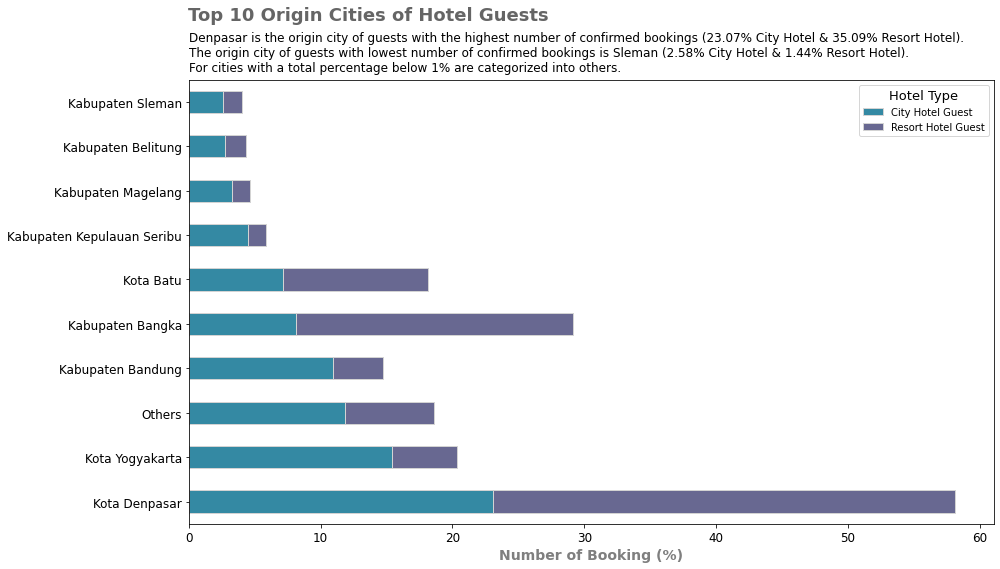

In [146]:
ax = guest_city.set_index('City').head(10).plot(kind='barh', stacked=True, color=['#3489a3','#686891'],figsize=(14,8),edgecolor='lightgray')

ax.set_title('Top 10 Origin Cities of Hotel Guests ', x=0.455, y=1.12, loc='right', fontweight='bold', fontsize=18, alpha=.6)
ax.text(x=0, y=9.7,fontsize=12, s="Denpasar is the origin city of guests with the highest number of confirmed bookings (23.07% City Hotel & 35.09% Resort Hotel).\nThe origin city of guests with lowest number of confirmed bookings is Sleman (2.58% City Hotel & 1.44% Resort Hotel).\nFor cities with a total percentage below 1% are categorized into others.")

ax.set_xlabel('Number of Booking (%)', fontweight='bold', fontsize=14, alpha=.5)
ax.set_ylabel('')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':10})

plt.tight_layout()
plt.show()

**Market Segmentation Analysis**

In [147]:
df_ms = df_fixed.loc[(df_fixed['is_canceled'] == 0)]
df_ms=df_ms.groupby(['market_segment','hotel']).agg({'is_canceled':'count'}).rename(columns={'is_canceled':'Number of Booking'}).reset_index().sort_values('Number of Booking', ascending=False)

In [148]:
# City Hotel Market Segmentation
ch_guests = df_ms.loc[(df_ms['hotel'] == 'City Hotel')]
total_ch_booking = ch_guests['Number of Booking'].sum()
ch_guests['pch_booking'] = round(ch_guests['Number of Booking'] / total_ch_booking * 100, 2)
ch_guests

,market_segment,hotel,Number of Booking,pch_booking
11,Online TA,City Hotel,24096,52.58
9,Offline TA/TO,City Hotel,9477,20.68
5,Direct,City Hotel,4962,10.83
7,Groups,City Hotel,4334,9.46
3,Corporate,City Hotel,2322,5.07
1,Complementary,City Hotel,460,1.00
0,Aviation,City Hotel,180,0.39


In [149]:
# Resort Hotel Market Segmentation
rh_guests = df_ms.loc[(df_ms['hotel'] == 'Resort Hotel')]
total_rh_booking = rh_guests['Number of Booking'].sum()
rh_guests['prh_booking'] = round(rh_guests['Number of Booking'] / total_rh_booking * 100, 2)

In [150]:
# Merge city hotel & resort hotel market segmentation
marseg = ch_guests.merge(rh_guests, how='outer', left_on = ['market_segment','hotel','Number of Booking','pch_booking'], right_on = ['market_segment','hotel','Number of Booking','prh_booking'])
marseg.columns=['Market Segmentation','Hotel','Number of Booking','%CH Booking','%RH Booking']
marseg

,Market Segmentation,Hotel,Number of Booking,%CH Booking,%RH Booking
0,Online TA,City Hotel,24096,52.58,NaN
1,Offline TA/TO,City Hotel,9477,20.68,NaN
2,Direct,City Hotel,4962,10.83,NaN
3,Groups,City Hotel,4334,9.46,NaN
4,Corporate,City Hotel,2322,5.07,NaN
5,Complementary,City Hotel,460,1.00,NaN
6,Aviation,City Hotel,180,0.39,NaN
7,Online TA,Resort Hotel,11237,NaN,39.93
8,Offline TA/TO,Resort Hotel,6245,NaN,22.19
9,Direct,Resort Hotel,5413,NaN,19.23


In [151]:
marseg['% Number of Booking']= marseg['%RH Booking'].fillna(marseg['%CH Booking'])
marseg = marseg.drop(['%CH Booking', '%RH Booking'], axis=1)
marseg

,Market Segmentation,Hotel,Number of Booking,% Number of Booking
0,Online TA,City Hotel,24096,52.58
1,Offline TA/TO,City Hotel,9477,20.68
2,Direct,City Hotel,4962,10.83
3,Groups,City Hotel,4334,9.46
4,Corporate,City Hotel,2322,5.07
5,Complementary,City Hotel,460,1.00
6,Aviation,City Hotel,180,0.39
7,Online TA,Resort Hotel,11237,39.93
8,Offline TA/TO,Resort Hotel,6245,22.19
9,Direct,Resort Hotel,5413,19.23


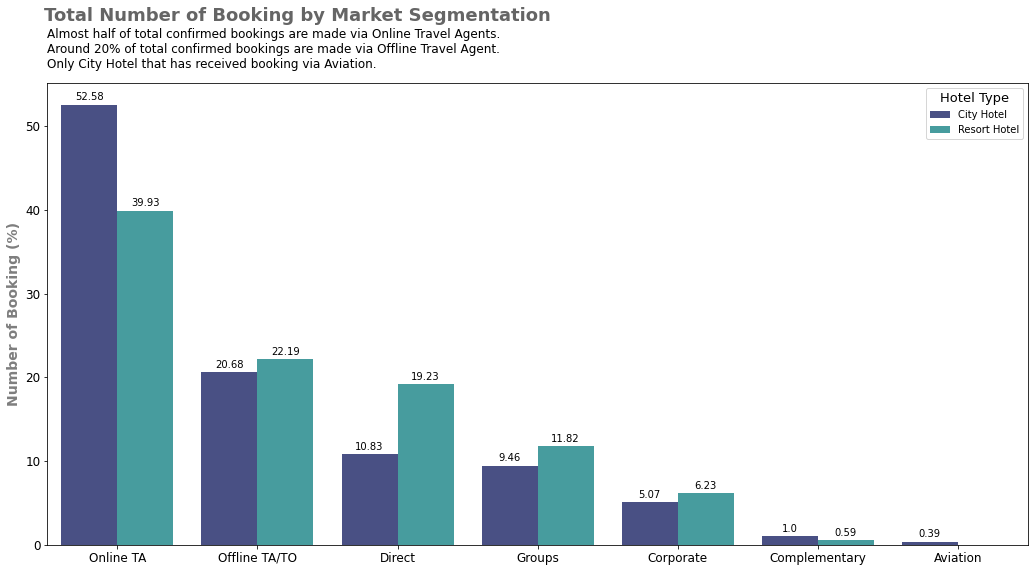

In [152]:
ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x='Market Segmentation', y='% Number of Booking',
                 palette='mako',hue='Hotel', data=marseg)

ax.set_title('Total Number of Booking by Market Segmentation ', x=0.52, y=1.12, loc='right', fontweight='bold', fontsize=18, alpha=.6)
ax.text(x=-0.5, y=57,fontsize=12, s="Almost half of total confirmed bookings are made via Online Travel Agents.\nAround 20% of total confirmed bookings are made via Offline Travel Agent.\nOnly City Hotel that has received booking via Aviation.")

ax.set_xlabel('')
ax.set_ylabel('Number of Booking (%)', fontweight='bold', fontsize=14, alpha=.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':10},loc='upper right')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.5,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 10)
    
plt.tight_layout()
plt.show()

**What is the busiest month for the hotel?**

In [153]:
df_month = df_final.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','is_canceled':'count'}).rename(columns={'is_canceled':'number_of_booking'}).reset_index()
df_month.columns = ['Hotel','Arrival Month','Years','Number of Booking']

In [154]:
df_month['Avg Number of Booking'] = round(df_month['Number of Booking']/df_month['Years'])
df_month

,Hotel,Arrival Month,Years,Number of Booking,Avg Number of Booking
0,City Hotel,April,2,4917,2458.0
1,City Hotel,August,2,7874,3937.0
2,City Hotel,December,2,7540,3770.0
3,City Hotel,February,2,4097,2048.0
4,City Hotel,January,2,4307,2154.0
5,City Hotel,July,2,8184,4092.0
6,City Hotel,June,2,7458,3729.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6411,3206.0
9,City Hotel,November,2,7377,3688.0


In [155]:
#Sort Value based on Hotel types and arrival month
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_month['Arrival Month'] = pd.Categorical(df_month['Arrival Month'], categories=month, ordered=True)
df_month = df_month.sort_values(['Hotel','Arrival Month']).reset_index()

In [156]:
df_month.drop('index',axis=1)

,Hotel,Arrival Month,Years,Number of Booking,Avg Number of Booking
0,City Hotel,January,2,4307,2154.0
1,City Hotel,February,2,4097,2048.0
2,City Hotel,March,2,3712,1856.0
3,City Hotel,April,2,4917,2458.0
4,City Hotel,May,2,6411,3206.0
5,City Hotel,June,2,7458,3729.0
6,City Hotel,July,2,8184,4092.0
7,City Hotel,August,2,7874,3937.0
8,City Hotel,September,3,8054,2685.0
9,City Hotel,October,3,8948,2983.0


In [157]:
table_month = pd.pivot_table( data=df_month, 
                        index=['Arrival Month'], 
                        columns=['Hotel'], 
                        values='Avg Number of Booking')
table_month

Hotel,City Hotel,Resort Hotel
Arrival Month,,
January,2154.0,1183.0
February,2048.0,1272.0
March,1856.0,1052.0
April,2458.0,1514.0
May,3206.0,1626.0
June,3729.0,1774.0
July,4092.0,1754.0
August,3937.0,1502.0
September,2685.0,1500.0


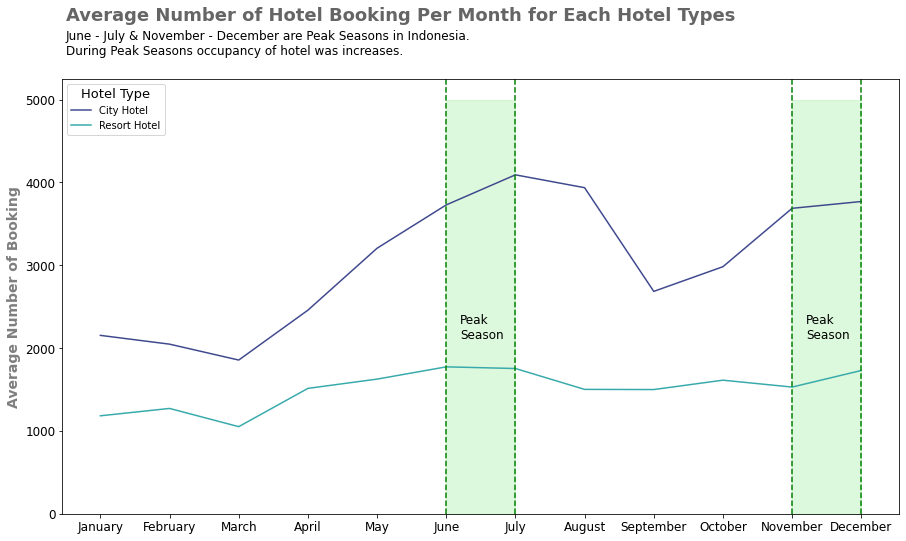

In [158]:
ax = plt.subplots(figsize = (15,8))

ax = sns.lineplot(data=df_month, x='Arrival Month', y='Avg Number of Booking', hue='Hotel',palette='mako')

ax.set_title('Average Number of Hotel Booking Per Month for Each Hotel Types', x=0.404, y=1.12, fontweight='bold', fontsize=18, alpha=.6)
ax.text(x=-0.5, y=5550,fontsize=12, s="June - July & November - December are Peak Seasons in Indonesia. \nDuring Peak Seasons occupancy of hotel was increases.")

ax.set_xlabel('')
ax.set_ylabel('Average Number of Booking', fontweight='bold', fontsize=14, alpha=.5)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title='Hotel Type', title_fontsize=13, prop={'size':10},loc='upper left')

ax.axvline('June', linestyle='--',color = 'green')
ax.axvline('July', linestyle='--',color = 'green')
ax.stackplot(np.arange(5,7), [[5000]], alpha=0.3, color ='lightgreen')
ax.text(x=5.2,y=2250, s='Peak\nSeason', fontsize=12, va='center')

ax.axvline('November', linestyle='--', color = 'green')
ax.axvline('December', linestyle='--', color = 'green')
ax.stackplot(np.arange(10,12), [[5000]], alpha=0.3, color ='lightgreen')
ax.text(x=10.2,y=2250,s='Peak\nSeason',fontsize=12, va='center')

plt.show()

**Impact analysis of stay duration on hotel bookings cancellation rate**

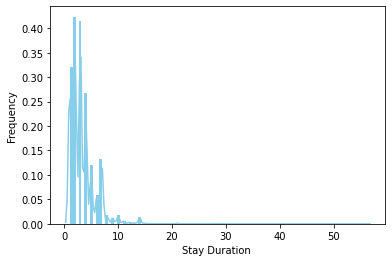

In [159]:
ax = sns.distplot(df_final['stay_duration'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Stay Duration ', ylabel='Frequency')
plt.show()

In [160]:
df_final['stay_duration'].describe(percentiles = [.25, .5, .75, .9, .99])

count    118088.000000
mean          3.447810
std           2.522487
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
90%           7.000000
99%          14.000000
max          56.000000
Name: stay_duration, dtype: float64

Stay duration has skewed distribution, so using percentiles to categorization is more effective.


In [161]:
# define stay duration at percentile 75% and 90%
sd_p75 = df_final['stay_duration'].quantile(.75)
sd_p90 = df_final['stay_duration'].quantile(.90)
sd_p99 = df_final['stay_duration'].quantile(.99)

# categorization stay duration
def stay_duration_type(x):
  if x < sd_p75:
    return 'Short'
  elif x < sd_p90:
    return 'Regular'
  elif x < sd_p99:
    return 'Long'
  else :
    return 'Extended'
  
df_final['stay_duration_type'] = df_final['stay_duration'].apply(lambda x : stay_duration_type(x))
df_final['stay_duration_type'].value_counts()

Short       75312
Regular     28944
Long        12496
Extended     1336
Name: stay_duration_type, dtype: int64

In [162]:
# retrieve cancellation rate by hotel type and stay duration type
cancle_sd = df_final.groupby(['hotel', 'stay_duration_type','is_canceled']).agg({'agent':'count'}).reset_index()
cancle_sd.columns = ['Hotel','Stay Duration Type','is_canceled','Number of Booking']
cancle_sd

,Hotel,Stay Duration Type,is_canceled,Number of Booking
0,City Hotel,Extended,0,61
1,City Hotel,Extended,1,188
2,City Hotel,Long,0,1730
3,City Hotel,Long,1,1294
4,City Hotel,Regular,0,12014
5,City Hotel,Regular,1,7566
6,City Hotel,Short,0,32026
7,City Hotel,Short,1,24000
8,Resort Hotel,Extended,0,776
9,Resort Hotel,Extended,1,311


In [163]:
sd_pivot = cancle_sd.pivot_table(index=['Hotel', 'Stay Duration Type'], columns='is_canceled', values='Number of Booking').reset_index().sort_values('Stay Duration Type', ascending=False)
sd_pivot['cancellation_rate'] = round(sd_pivot[1]*100.0/(sd_pivot[0]+sd_pivot[1]), 2)
sd_pivot.columns = ['Hotel','Stay Duration Type','Processed','Cancelled','Cancellation Rate']
sd_pivot

,Hotel,Stay Duration Type,Processed,Cancelled,Cancellation Rate
3,City Hotel,Short,32026,24000,42.84
7,Resort Hotel,Short,14544,4742,24.59
2,City Hotel,Regular,12014,7566,38.64
6,Resort Hotel,Regular,6389,2975,31.77
1,City Hotel,Long,1730,1294,42.79
5,Resort Hotel,Long,6433,3039,32.08
0,City Hotel,Extended,61,188,75.50
4,Resort Hotel,Extended,776,311,28.61


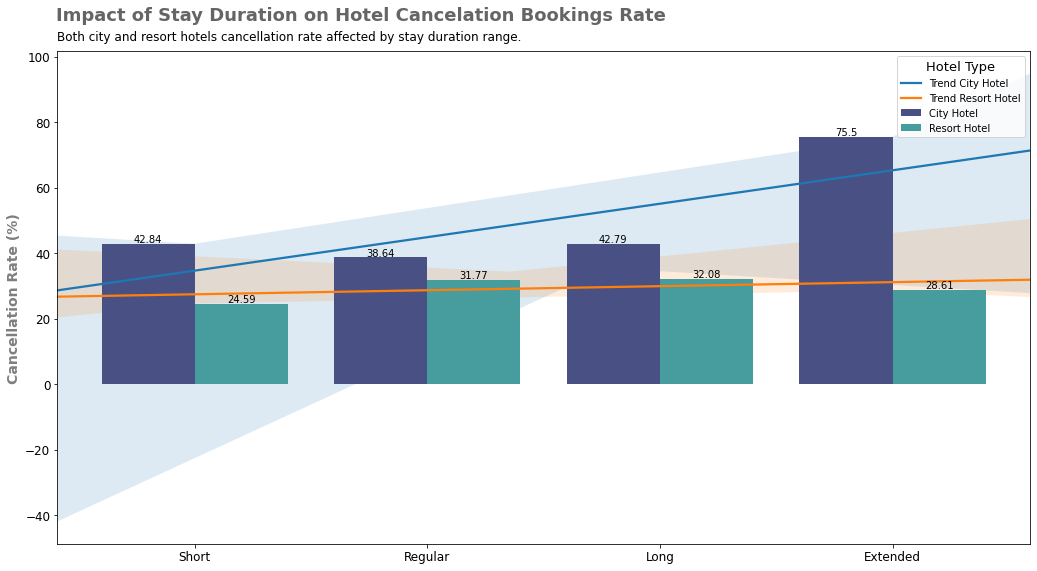

In [164]:
ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x='Stay Duration Type', y='Cancellation Rate',
                 palette='mako',hue='Hotel', data=sd_pivot)

ax.set_title('Impact of Stay Duration on Hotel Cancelation Bookings Rate', x=0.626, y=1.05, loc='right', fontweight='bold', fontsize=18, alpha=.6)
ax.text(x=-0.59, y=105,fontsize=12, s="Both city and resort hotels cancellation rate affected by stay duration range.")

sns.regplot(x=np.arange(0, len(sd_pivot[sd_pivot['Hotel'] == 'City Hotel'])), y='Cancellation Rate', 
            data=sd_pivot[sd_pivot['Hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(sd_pivot[sd_pivot['Hotel'] == 'City Hotel'])), y='Cancellation Rate', 
            data=sd_pivot[sd_pivot['Hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

ax.set_xlabel('')
ax.set_ylabel('Cancellation Rate (%)', fontweight='bold', fontsize=14, alpha=.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':10},loc='upper right')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.5,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 10)
    
plt.tight_layout()
plt.show()

**Impact analysis of Lead Time on hotel bookings cancellation rate**

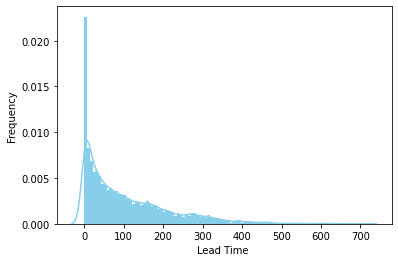

In [165]:
ax = sns.distplot(df_final['lead_time'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Lead Time ', ylabel='Frequency')
plt.show()

In [166]:
df_final['lead_time'].describe(percentiles = [.1, .2, .25, .35, .5, .6, .75, .9])

count    118088.000000
mean        104.796719
std         106.954505
min           0.000000
10%           3.000000
20%          12.000000
25%          19.000000
35%          36.000000
50%          70.000000
60%         100.000000
75%         161.000000
90%         265.000000
max         709.000000
Name: lead_time, dtype: float64

In [167]:
# define stay duration at percentile 75% and 90%
sd_p35 = df_final['lead_time'].quantile(.35)
sd_p60 = df_final['lead_time'].quantile(.60)
sd_p99 = df_final['lead_time'].quantile(.99)

# categorization stay duration
def lead_time_type(x):
  if x < sd_p35:
    return 'Fast'
  elif x < sd_p60:
    return 'Medium'
  elif x < sd_p99:
    return 'Slow'
  else :
    return 'Super Slow'
  
df_final['lead_time_type'] = df_final['lead_time'].apply(lambda x : lead_time_type(x))
df_final['lead_time_type'].value_counts()

Slow          46335
Fast          41189
Medium        29347
Super Slow     1217
Name: lead_time_type, dtype: int64

In [168]:
cancle_lt = df_final.groupby(['hotel', 'lead_time_type','is_canceled']).agg({'agent':'count'}).reset_index()
cancle_lt.columns = ['Hotel','Lead Time Type','is_canceled','Number of Booking']
cancle_lt

,Hotel,Lead Time Type,is_canceled,Number of Booking
0,City Hotel,Fast,0,19357
1,City Hotel,Fast,1,6093
2,City Hotel,Medium,0,12273
3,City Hotel,Medium,1,8539
4,City Hotel,Slow,0,13959
5,City Hotel,Slow,1,17547
6,City Hotel,Super Slow,0,242
7,City Hotel,Super Slow,1,869
8,Resort Hotel,Fast,0,13514
9,Resort Hotel,Fast,1,2225


In [169]:
lt_pivot = cancle_lt.pivot_table(index=['Hotel', 'Lead Time Type'], columns='is_canceled', values='Number of Booking').reset_index().sort_values('Lead Time Type', ascending=False)

In [170]:
lt_pivot = cancle_lt.pivot_table(index=['Hotel', 'Lead Time Type'], columns='is_canceled', values='Number of Booking').reset_index().sort_values('Lead Time Type', ascending=True)
lt_pivot['cancellation_rate'] = round(lt_pivot[1]*100.0/(lt_pivot[0]+lt_pivot[1]), 2)
lt_pivot.columns = ['Hotel','Lead Time Type','Processed','Cancelled','Cancellation Rate']
lt_pivot

,Hotel,Lead Time Type,Processed,Cancelled,Cancellation Rate
0,City Hotel,Fast,19357,6093,23.94
4,Resort Hotel,Fast,13514,2225,14.14
1,City Hotel,Medium,12273,8539,41.03
5,Resort Hotel,Medium,5616,2919,34.20
2,City Hotel,Slow,13959,17547,55.69
6,Resort Hotel,Slow,8963,5866,39.56
3,City Hotel,Super Slow,242,869,78.22
7,Resort Hotel,Super Slow,49,57,53.77


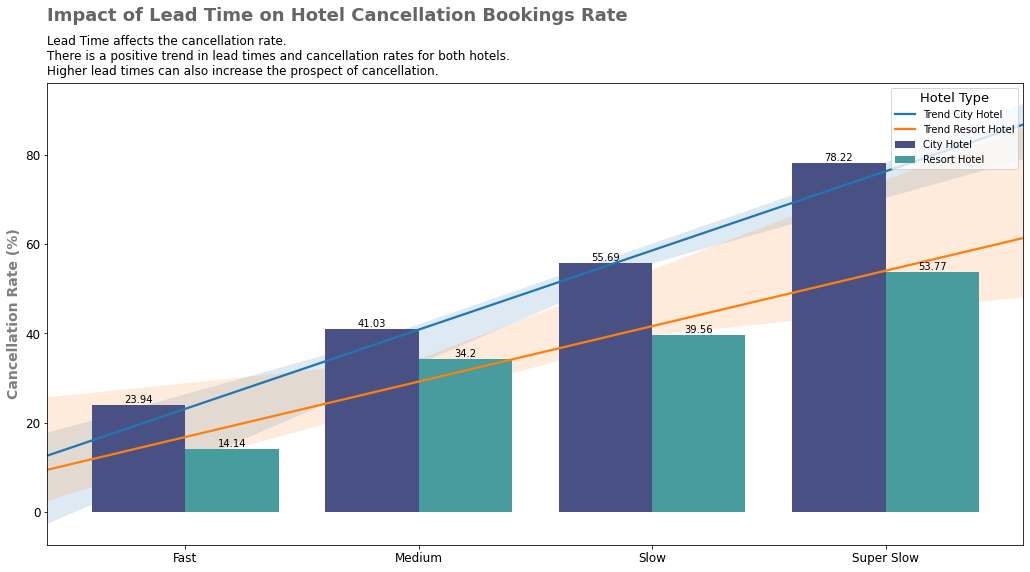

In [171]:
ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x='Lead Time Type', y='Cancellation Rate',
                 palette='mako',hue='Hotel', data=lt_pivot)

ax.set_title('Impact of Lead Time on Hotel Cancellation Bookings Rate', x=0.595, y=1.12, loc='right', fontweight='bold', fontsize=18, alpha=.6)
ax.text(x=-0.59, y=98,fontsize=12, s="Lead Time affects the cancellation rate. \nThere is a positive trend in lead times and cancellation rates for both hotels. \nHigher lead times can also increase the prospect of cancellation.")

sns.regplot(x=np.arange(0, len(lt_pivot[lt_pivot['Hotel'] == 'City Hotel'])), y='Cancellation Rate', 
            data=lt_pivot[lt_pivot['Hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel',truncate=False)
sns.regplot(x=np.arange(0, len(lt_pivot[lt_pivot['Hotel'] == 'City Hotel'])), y='Cancellation Rate', 
            data=lt_pivot[lt_pivot['Hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel',  truncate=False)

ax.set_xlabel('')
ax.set_ylabel('Cancellation Rate (%)', fontweight='bold', fontsize=14, alpha=.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':10},loc='upper right')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.5,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 10)
    
plt.tight_layout()
plt.show()